<a href="https://colab.research.google.com/github/camoeiras/UFPA_FICCD/blob/main/ficcd_atividade4_carlos_oeiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_____________________________
A - Correlação
_____________________________

Fazer dois gráficos:

  Um com 9 pontos que se alinham aproximadamente em uma reta.

  Outro com 9 pontos gerados aleatoriamente com distribuição uniforme no mesmo intervalo.

Usar a função linregress para:

  Achar a reta que representa os dados.

  Calcular o p-valor e coeficiente de correlação.

  Interpretar os resultados.

Calcular a covariância e interpretar.


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

np.random.seed(42)

In [100]:
# Dataset 1: Alinhados em uma reta
x1 = np.arange(1, 10)
y1 = 3 * x1 + 5  # -> Relação linear perfeita

In [101]:
def analisar_dados(x, y, titulo):
    # Regressão linear
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    linha_ajustada = slope * x + intercept

    # Covariância
    cov_matrix = np.cov(x, y)
    covariancia = cov_matrix[0, 1]

    # Plot
    plt.scatter(x, y, label='Dados')
    plt.plot(x, linha_ajustada, color='red', label=f'Reta ajustada: y = {slope:.2f}x + {intercept:.2f}')
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Análise
    print(f" {titulo}")
    print(f"Coeficiente angular (slope): {slope:.2f}")
    print(f"Intercepto: {intercept:.2f}")
    print(f"Coeficiente de correlação (r): {r_value:.4f}")
    print(f"Coeficiente de determinação (r²): {r_value**2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Covariância: {covariancia:.2f}")
    if p_value < 0.05:
        print("→ Existe uma correlação estatisticamente significativa.\n")
    else:
        print("→ Não há evidência de correlação significativa.\n")

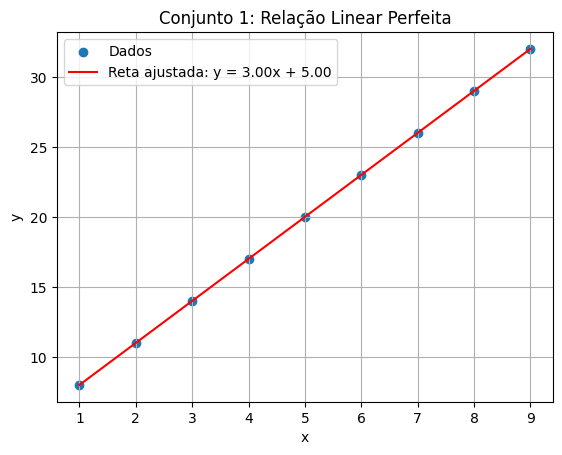

 Conjunto 1: Relação Linear Perfeita
Coeficiente angular (slope): 3.00
Intercepto: 5.00
Coeficiente de correlação (r): 1.0000
Coeficiente de determinação (r²): 1.0000
p-value: 0.0000
Covariância: 22.50
→ Existe uma correlação estatisticamente significativa.



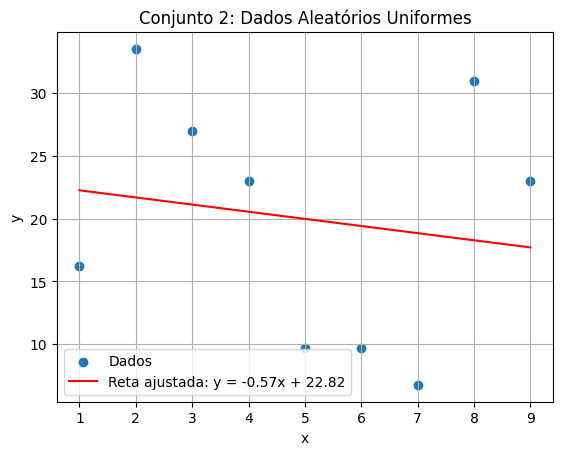

 Conjunto 2: Dados Aleatórios Uniformes
Coeficiente angular (slope): -0.57
Intercepto: 22.82
Coeficiente de correlação (r): -0.1585
Coeficiente de determinação (r²): 0.0251
p-value: 0.6838
Covariância: -4.27
→ Não há evidência de correlação significativa.



In [102]:
# Executa as análises
analisar_dados(x1, y1, "Conjunto 1: Relação Linear Perfeita")
analisar_dados(x2, y2, "Conjunto 2: Dados Aleatórios Uniformes")

Função linregress

Faz parte do pacote Scipy "from scipy.stats import linregress"

utiliza-se de regressão linear sobre dois conjuntos de dados numéricos (X e Y), retornando estatisticas importantes que descrevem a melhor reta se ajusta aos dados.

_____________________________
B - Estimando um Intervalo de Confiança para a Média
_____________________________

Obter um conjunto de dados amostrais (ex: pesos, notas etc.).

Calcular o intervalo de confiança de 95% para a média populacional com:

Média e desvio padrão da amostra.

Fórmula do intervalo de confiança ou scipy.stats.

Desafio: repetir para níveis diferentes (90%, 99%) e comparar os resultados.

Visualizar os intervalos com um gráfico usando matplotlib.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [104]:
# 1. Dados amostrais (exemplo: pesos)
pesos = [70, 72, 68, 65, 74, 71, 69, 70, 73, 68]
media = np.mean(pesos)
desvio_padrao = np.std(pesos, ddof=1)  # ddof=1 para amostra
n = len(pesos)

In [105]:
# 2. Função para calcular intervalo de confiança
def intervalo_confianca(nivel_confianca):
    alpha = 1 - nivel_confianca
    t_critico = stats.t.ppf(1 - alpha/2, df=n-1)
    margem_erro = t_critico * (desvio_padrao / np.sqrt(n))
    return media - margem_erro, media + margem_erro

In [106]:
# 3. Calcular e exibir para vários níveis
niveis = [0.90, 0.95, 0.99]
intervalos = []
for nc in niveis:
    inf, sup = intervalo_confianca(nc)
    intervalos.append((nc, inf, sup))
    print(f"{int(nc*100)}% IC: ({inf:.2f}, {sup:.2f})")

90% IC: (68.45, 71.55)
95% IC: (68.09, 71.91)
99% IC: (67.26, 72.74)


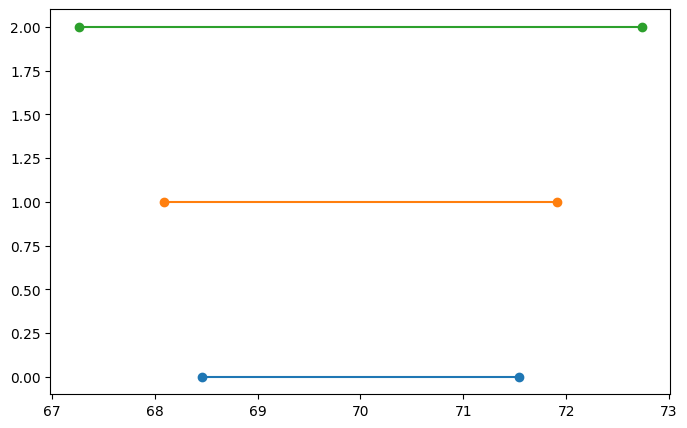

In [107]:
# 4. Visualizar os intervalos com matplotlib
plt.figure(figsize=(8, 5))
for i, (nc, inf, sup) in enumerate(intervalos):
    plt.plot([inf, sup], [i, i], marker='o', label=f'{int(nc*100)}% IC')

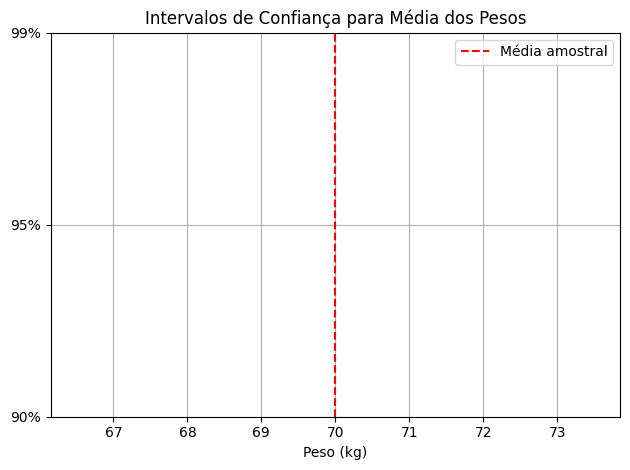

In [108]:
plt.axvline(media, color='red', linestyle='--', label='Média amostral')
plt.yticks(range(len(niveis)), [f'{int(nc*100)}%' for nc in niveis])
plt.title('Intervalos de Confiança para Média dos Pesos')
plt.xlabel('Peso (kg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Análise dos resultados:

Intervalo de Confiança 'IC': faixa onde estimamos que esteja a média verdadeira da população com certo nível de confiança.
O nível de confiança mais alto -> intervalo mais largo, pois queremos mais certeza.
Uso da distribuição para amostras pequenas (n < 30)


_____________________________
C - p-value em um Teste de Hipótese
_____________________________

Fornecer dois conjuntos de dados: grupo controle e grupo teste.

Formular a hipótese nula (H0): geralmente, “as médias são iguais”.

Realizar o teste t de duas amostras independentes com scipy.stats.ttest_ind.

Interpretar o p-value e decidir se rejeita a hipótese nula com base em um nível de significância, por exemplo, 0.05.

In [109]:
import numpy as np
from scipy.stats import ttest_ind

In [110]:
# 1. Dados simulados
controle = [50, 52, 48, 47, 49, 51, 50, 48]
teste = [55, 57, 54, 53, 56, 58, 55, 54]

2 Hipóteses:

H0: média do grupo controle == média do grupo teste

H1: médias diferentes

In [111]:
# 3. Teste t de duas amostras independentes
t_stat, p_value = ttest_ind(teste, controle)

In [112]:
# 4. Interpretação
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 7.0063
P-value: 0.0000


In [113]:
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos H0: Existe diferença significativa entre os grupos.")
else:
    print("Não rejeitamos H0: Não há diferença estatisticamente significativa.")

Rejeitamos H0: Existe diferença significativa entre os grupos.


Obs:

t-statistic mede a diferença entre as médias em termos de erro padrão.

p-value:

* Se menor que 0.05 (nível de significância), rejeitamos H0.

* Se maior, não rejeitamos H0.


Exemplo:
O grupo teste tem médias maiores.

o p-value tende a ser muito pequeno, indicando uma diferença real.

Validação estatistica:

* Os grupos são independentes.

* A variável é aproximadamente normalmente distribuída (com n ≥ 30, isso é menos crítico).

* As variâncias são semelhantes (assumido por padrão; para variâncias diferentes, use equal_var=False).



_____________________________
D - significance_level
_____________________________

In [114]:
import numpy as np
from scipy.stats import ttest_ind

In [115]:
# Parâmetros
num_simulations = 10000
sample_size = 30
true_mean = 50
true_std = 10

In [116]:
# Testado com dois níveis diferentes de significância
for significance_level in [0.05, 0.01]:
    significant_results = 0

    for _ in range(num_simulations):
        # Grupos com mesma média e desvio (H0 verdadeira)
        group1 = np.random.normal(true_mean, true_std, sample_size)
        group2 = np.random.normal(true_mean, true_std, sample_size)

        # Teste t
        t_stat, p_value = ttest_ind(group1, group2)

        if p_value < significance_level:
            significant_results += 1

    proportion_significant = significant_results / num_simulations

    # Resultados
    print(f"\n Significance level (alpha): {significance_level}")
    print(f" Proportion of Type I errors: {proportion_significant:.4f}")


 Significance level (alpha): 0.05
 Proportion of Type I errors: 0.0508

 Significance level (alpha): 0.01
 Proportion of Type I errors: 0.0116


Slides da explicação e resultados estão neste link: https://docs.google.com/presentation/d/1SSzHBPLr6Cwb_ocU2l0sRpkZ5EVDo69AV-i41fNSsyg/edit?usp=sharing

_____________________________
E - reproduzindo slides em código
_____________________________

Reproduza em Python o conteúdo dos slides de 24 a 46.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# População simulada (conhecida, como referência)
np.random.seed(42)
populacao = np.random.normal(loc=100, scale=15, size=100000)

In [118]:
# Parâmetros da população
media_real = np.mean(populacao)
print(f"Média real da população: {media_real:.2f}")

Média real da população: 100.01


In [119]:
# Função para calcular intervalo de confiança de uma amostra
def calc_ic(amostra, nivel_confianca=0.95):
    n = len(amostra)
    media = np.mean(amostra)
    std = np.std(amostra, ddof=1)
    t = stats.t.ppf(1 - (1 - nivel_confianca)/2, df=n-1)
    erro = t * (std / np.sqrt(n))
    return media - erro, media + erro, media

In [120]:
# Visualizar vários ICs baseados em diferentes amostras
num_amostras = 25
tamanho_amostra = 40
nivel_confianca = 0.95

plt.figure(figsize=(10, 8))
erros = 0

<Figure size 1000x800 with 0 Axes>

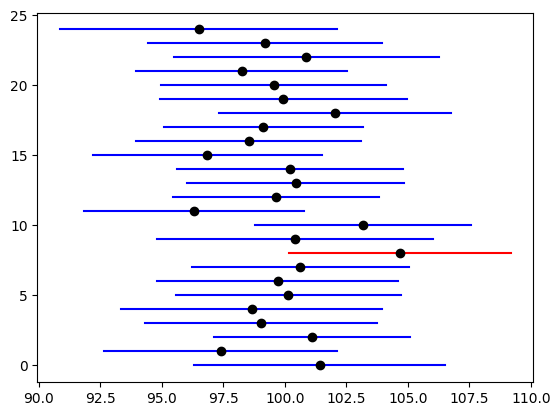

In [121]:
for i in range(num_amostras):
    amostra = np.random.choice(populacao, size=tamanho_amostra, replace=False)
    inf, sup, media = calc_ic(amostra, nivel_confianca)

    if inf <= media_real <= sup:
        plt.plot([inf, sup], [i, i], color='blue')
    else:
        plt.plot([inf, sup], [i, i], color='red')  # falhou em capturar a média real
        erros += 1

    plt.plot(media, i, 'ko')  # ponto central

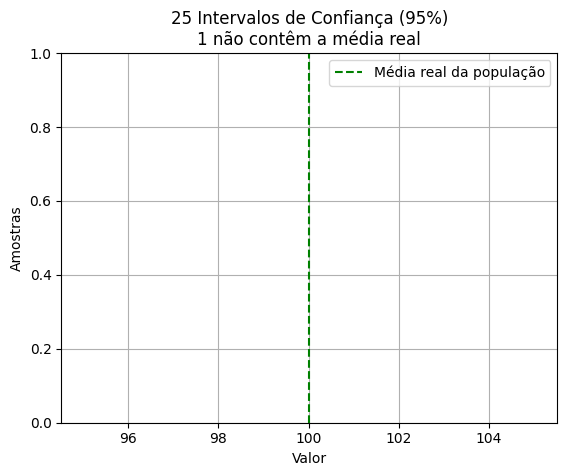

In [122]:
plt.axvline(media_real, color='green', linestyle='--', label='Média real da população')
plt.title(f'{num_amostras} Intervalos de Confiança ({int(nivel_confianca*100)}%)\n{erros} não contêm a média real')
plt.xlabel('Valor')
plt.ylabel('Amostras')
plt.legend()
plt.grid(True)
plt.show()

Explicação:

cada linha é um IC gerado a partir de uma amostra aleatória.

A linha verde é a média real da população.

Linhas vermelhas representam ICs que falharam em conter a média verdadeira.

Com IC de 95%, espera-se que ~5% dos intervalos não incluam a média da população.

Conclusão:


Demonstra como o IC varia de acordo com a amostra, mesmo com o mesmo tamanho e nível de confiança.

Reflete graficamente o conceito estatístico de confiança baseada em repetição.